#Extracting the GitHub Dataset

In [30]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
urllib.request.urlretrieve("https://github.com/csisc/WikiGitHub/blob/main/output.xlsx?raw=true", "output.xlsx")

('output.xlsx', <http.client.HTTPMessage at 0x7bc27cfc9150>)

In [32]:
df = pd.read_excel("output.xlsx")

In [33]:
df["User"] = df["Full name"].apply(lambda x: x[0:x.index("/")])
df["Number of files"] = df["Files"].apply(lambda x: x.count("|"))

In [34]:
df["hasURL"] = df["Home Page"].notna()
df["HighlyStarred"] = df["Number of stars"] > 300

In [35]:
df["Year created"] = df["Date created"].apply(lambda x: x[0:x.find("-")])
df["Year of last push"] = df["Date of last push"].apply(lambda x: x[0:x.find("-")])

In [36]:
print(list(df["License"]))
License = list(df["License"])
dict01 = {"Copyright": "All Rights Reserved", "MIT": "MIT", "GNU GENERAL PUBLIC LICENSE": "GNU General Public License", "GPL": "GNU General Public License",
          "copyright": "All Rights Reserved", "(c)": "All Rights Reserved", "C": "All Rights Reserved", "Attribution-ShareAlike 4.0 International": "CC BY-SA",
          "Attribution 4.0 International": "CC BY", "YEAR": "All Rights Reserved", "public domain": "Public Domain or CC0", "## creative commons": "CC BY-NC",
          "All rights reserved": "All Rights Reserved", 'The license text below "----"': "GNU General Public License", "BSD": "BSD License",
          "Public Domain": "Public Domain or CC0", "publicdomain": "Public Domain or CC0", "Apache": "Apache License", "Public domain": "Public Domain or CC0", "NOTE": "MIT"}
def mit(x, s):
  if (type(x) == type("str")):
    if (x.count(s) > 0):
      return dict01[s]
    else:
      return x
  else:
    return "All Rights Reserved"
for s in dict01:
  License = [mit(x, s) for x in License]
def others(x):
  list02 = ["All Rights Reserved", "MIT", "GNU General Public License", "Apache License", "BSD License"]
  if x in list02:
    return x
  else:
    return "Others"
License = [others(x) for x in License]
df["License"] = License
print(list(df["License"]))

['Copyright (c) 2014 Zhipeng Jiang', 'The MIT License (MIT)', nan, nan, 'GNU GENERAL PUBLIC LICENSE', 'GNU GENERAL PUBLIC LICENSE', nan, nan, nan, 'The MIT License (MIT)', nan, 'The MIT License (MIT)', 'The MIT License (MIT)', 'ISC License (ISC)', nan, nan, nan, 'MIT License', 'GNU LESSER GENERAL PUBLIC LICENSE', nan, 'Copyright (C) 2014 Acini (alias)', nan, 'The MIT License (MIT)', 'The MIT License (MIT)', 'Apache License', nan, nan, nan, 'Attribution-ShareAlike 4.0 International', nan, nan, 'The MIT License (MIT)', nan, nan, nan, 'GNU GENERAL PUBLIC LICENSE', 'Copyright 2022 Ailef', 'MIT License', 'GNU GENERAL PUBLIC LICENSE', 'The MIT License (MIT)', 'Apache License', 'Apache License', nan, 'MIT License', nan, 'MIT License', 'Thanks to https://github.com/perrygeo/leaflet-simple-csv for some code', nan, 'MIT License', 'GNU GENERAL PUBLIC LICENSE', nan, nan, 'MIT License', nan, 'Apache License', 'GNU AFFERO GENERAL PUBLIC LICENSE', nan, 'The MIT License (MIT)', 'MIT License', 'Apache 

In [37]:
listcatr = list(df["Category"])
listcatr = list(map(lambda x: x.replace('Wiki','Generic'), listcatr))
listcatr = list(map(lambda x: x.replace('Genericpedia','Wikipedia'), listcatr))
listcatr = list(map(lambda x: x.replace('Genericdata','Wikidata'), listcatr))
df["Category"] = listcatr

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Full name          1976 non-null   object
 1   Description        1976 non-null   object
 2   Date created       1976 non-null   object
 3   Date of last push  1976 non-null   object
 4   Home Page          1452 non-null   object
 5   Language           1976 non-null   object
 6   Number of forks    1976 non-null   int64 
 7   Number of stars    1976 non-null   int64 
 8   License            1976 non-null   object
 9   Files              1976 non-null   object
 10  Topics             645 non-null    object
 11  Issues             1021 non-null   object
 12  Category           1976 non-null   object
 13  User               1976 non-null   object
 14  Number of files    1976 non-null   int64 
 15  hasURL             1976 non-null   bool  
 16  HighlyStarred      1976 non-null   bool  


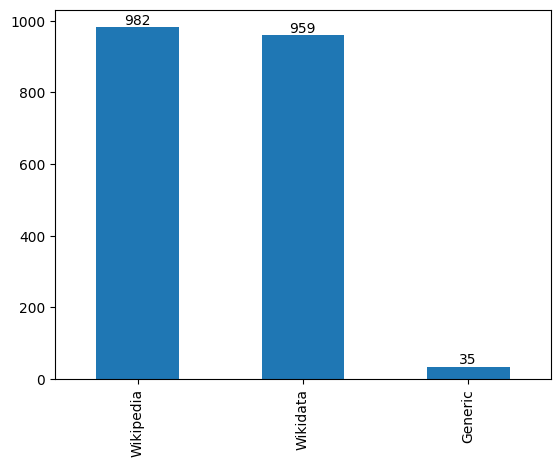

In [39]:
catplot = df["Category"].value_counts().plot(kind="bar")
catplot.bar_label(catplot.containers[0], label_type='edge', rotation='horizontal');

#Univariate Analysis

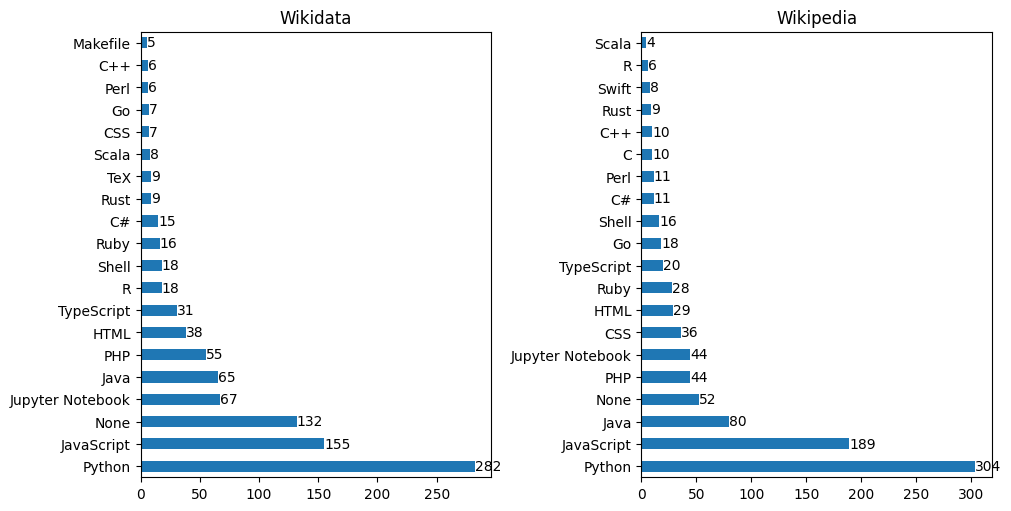

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"]["Language"].value_counts()[0:20].plot(kind="barh", ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"]["Language"].value_counts()[0:20].plot(kind="barh", ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');
plt.show();

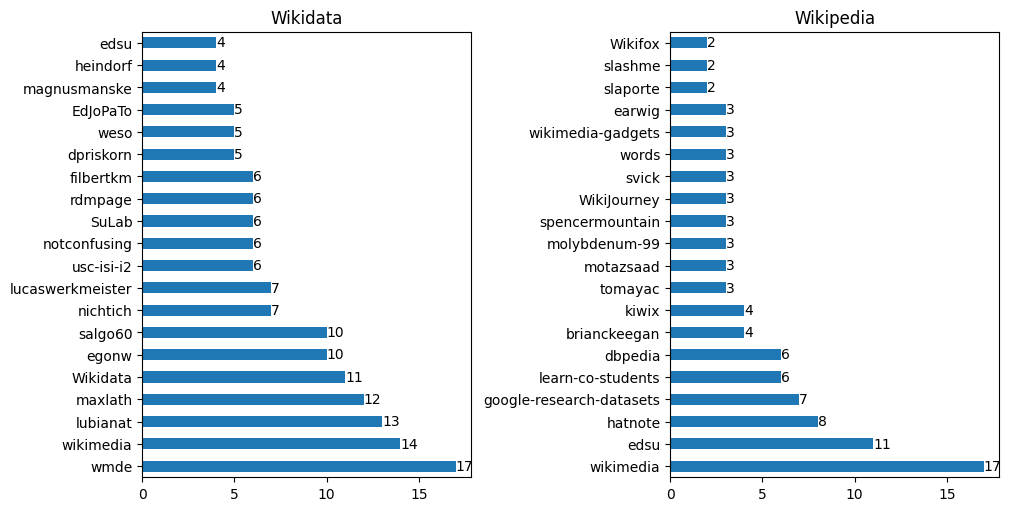

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"]["User"].value_counts()[0:20].plot(kind="barh", ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"]["User"].value_counts()[0:20].plot(kind="barh", ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');
plt.show();

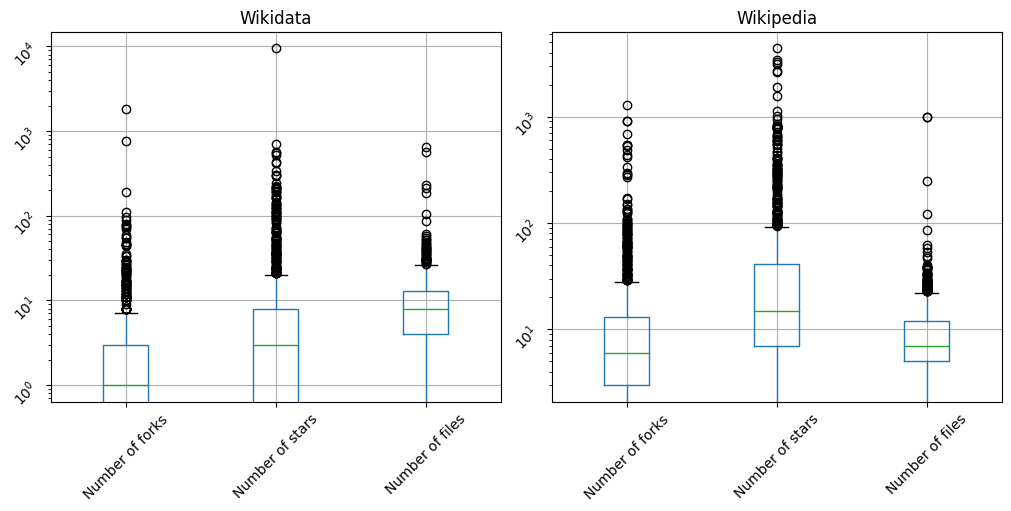

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"].boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], ax=axs[0])
axs[0].set_yscale('log')
axs[0].set_title("Wikidata")
axs[0].tick_params(labelrotation=45)
df[df["Category"] == "Wikipedia"].boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_title("Wikipedia")
axs[1].tick_params(labelrotation=45)
plt.show();

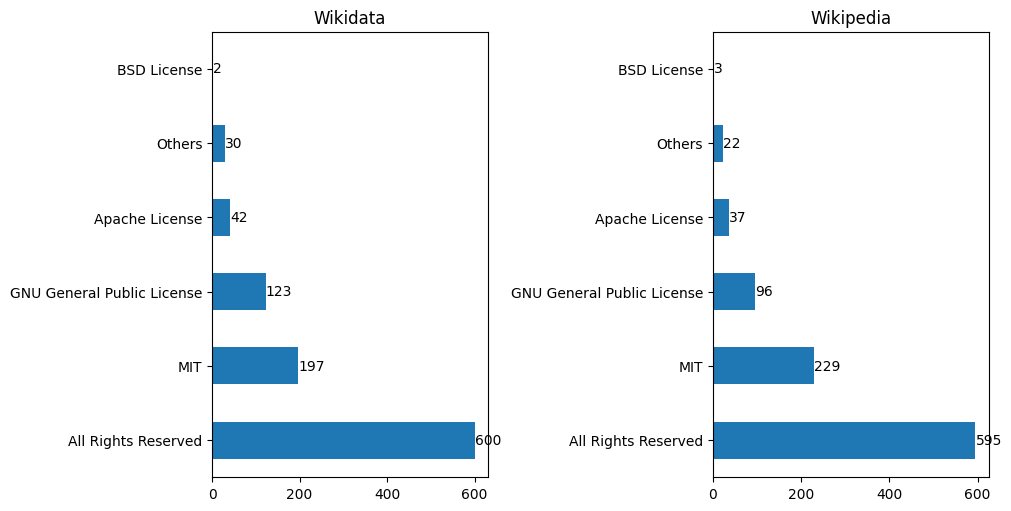

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"]["License"].value_counts()[0:20].plot(kind="barh", ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"]["License"].value_counts()[0:20].plot(kind="barh", ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');
plt.show();

[Text(0, 0, 'Wikidata'), Text(0, 1, 'Wikipedia')]

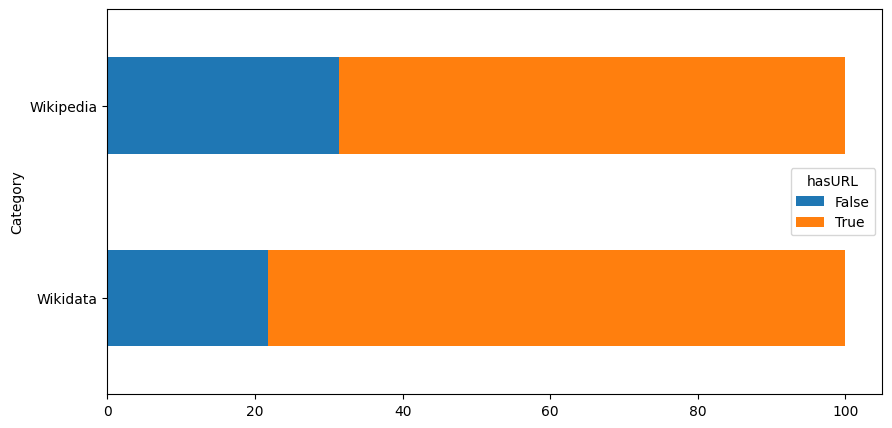

In [44]:
df.groupby([df['Category'] == "Wikipedia"])['hasURL'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, figsize=(10,5)).set_yticklabels(["Wikidata", "Wikipedia"])

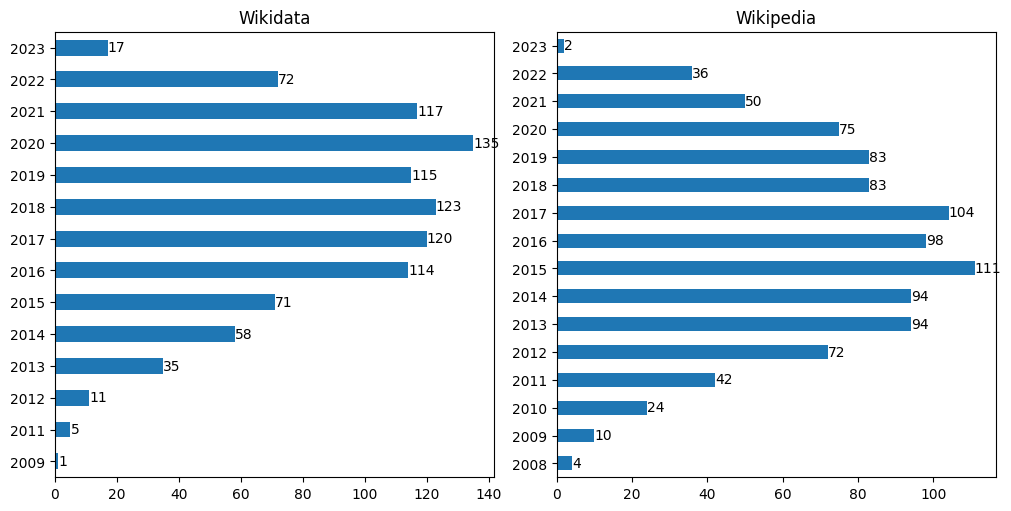

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"]["Year created"].value_counts()[0:20].sort_index().plot(kind="barh", ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"]["Year created"].value_counts()[0:20].sort_index().plot(kind="barh", ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');
plt.show();

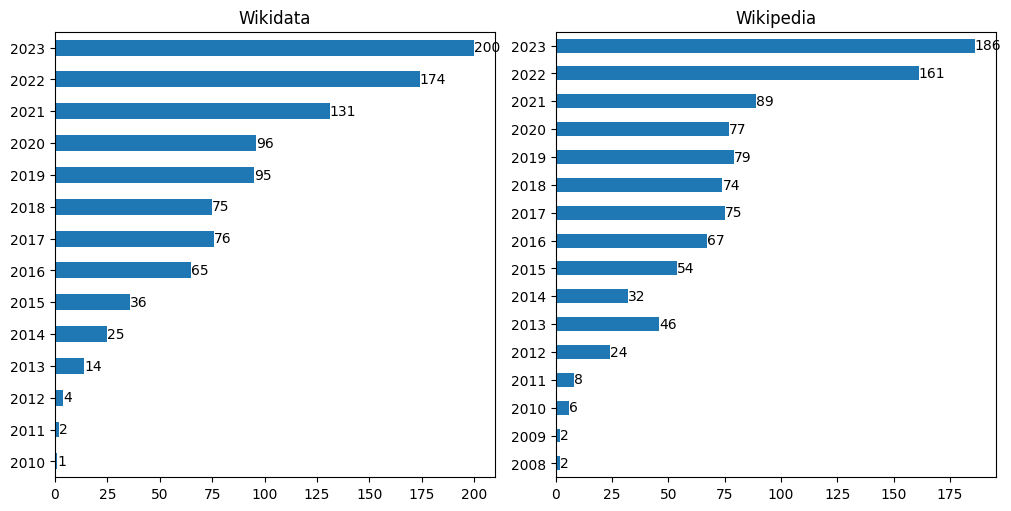

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"]["Year of last push"].value_counts()[0:20].sort_index().plot(kind="barh", ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"]["Year of last push"].value_counts()[0:20].sort_index().plot(kind="barh", ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');
plt.show();

[Text(0, 0, '615'),
 Text(0, 0, '111'),
 Text(0, 0, '57'),
 Text(0, 0, '47'),
 Text(0, 0, '41'),
 Text(0, 0, '39'),
 Text(0, 0, '38'),
 Text(0, 0, '35'),
 Text(0, 0, '34'),
 Text(0, 0, '34'),
 Text(0, 0, '33'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '25'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '24'),
 Text(0, 0, '22')]

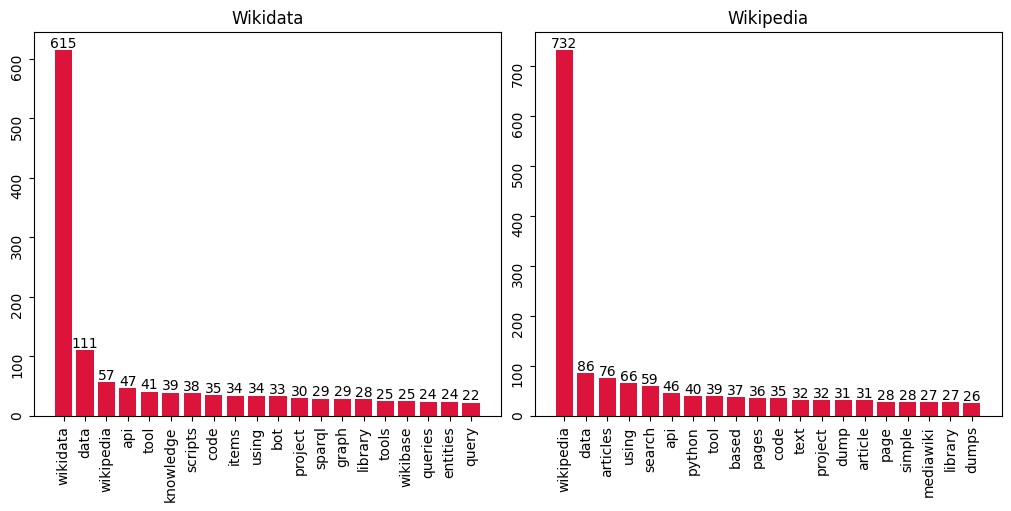

In [47]:
!pip install stop-words
from stop_words import get_stop_words
import string
stop_words = get_stop_words('en')
stop_words.append("none")
word = []
for m in df[df["Category"] == "Wikipedia"]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):
  word += m
from collections import Counter
c = Counter(word)
wordlt = c.most_common(100)
wordlt = [x for x in wordlt if (not(x[0] in stop_words) and (len(x[0])>1))]
x_data = [x[0] for x in wordlt][0:20]
y_data = [x[1] for x in wordlt][0:20]
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
axs[1].bar(x_data, y_data, color='crimson')
axs[1].set_title("Wikipedia")
axs[1].tick_params(rotation=90)
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal')
word = []
for m in df[df["Category"] != "Wikipedia"]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):
  word += m
from collections import Counter
c = Counter(word)
wordlt = c.most_common(100)
wordlt = [x for x in wordlt if (not(x[0] in stop_words) and (len(x[0])>1))]
x_data = [x[0] for x in wordlt][0:20]
y_data = [x[1] for x in wordlt][0:20]
axs[0].bar(x_data, y_data, color='crimson')
axs[0].set_title("Wikidata")
axs[0].tick_params(rotation=90)
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal')

# Multivariate Analysis

<ipython-input-48-06daf03f5b1a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Category"] != "Wikipedia"][df["Year created"] <= df["Year of last push"]].groupby(["Year created"])["Year of last push"].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, colormap="tab20", ax=axs[0])
<ipython-input-48-06daf03f5b1a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Category"] == "Wikipedia"][df["Year created"] <= df["Year of last push"]].groupby(["Year created"])["Year of last push"].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, colormap="tab20", ax=axs[1])


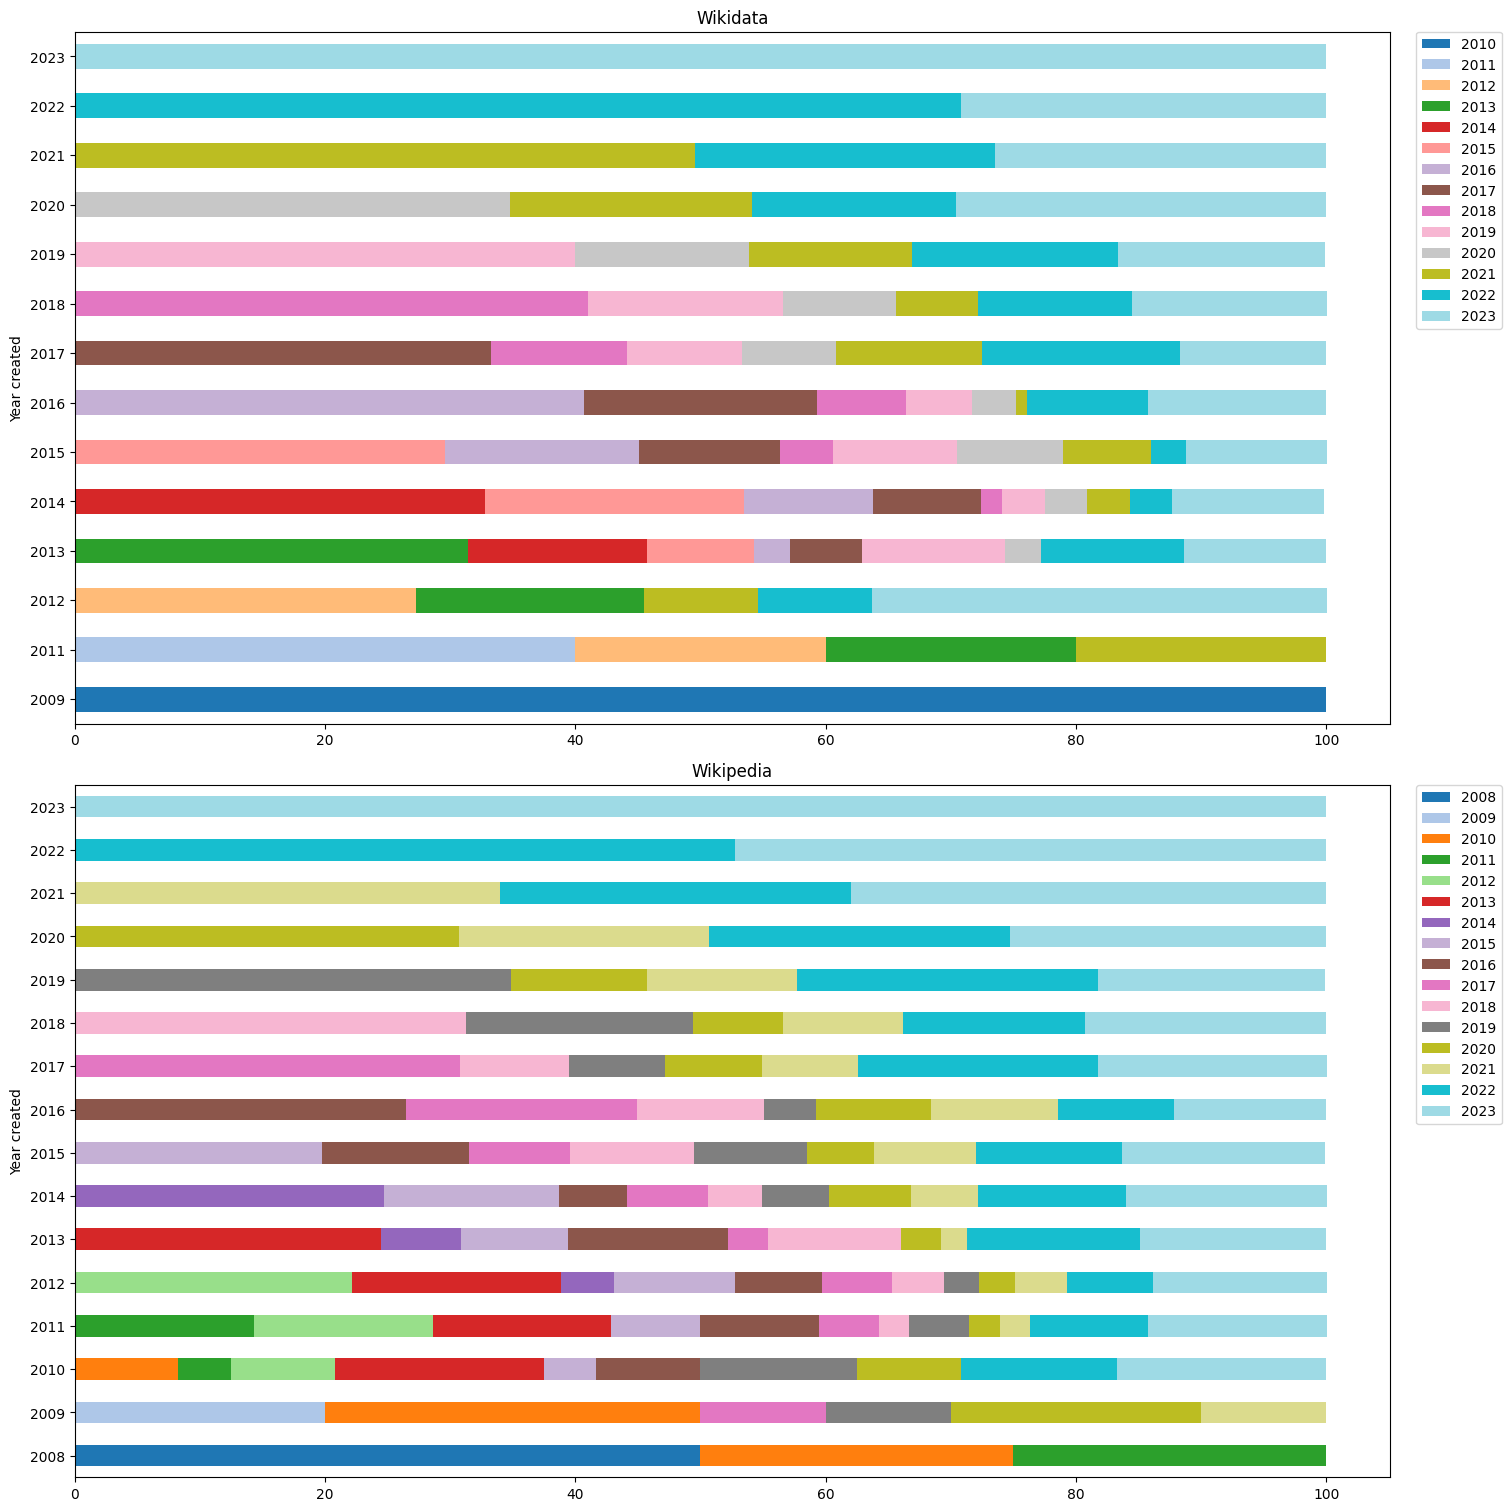

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(15,15), constrained_layout=True)
df[df["Category"] != "Wikipedia"][df["Year created"] <= df["Year of last push"]].groupby(["Year created"])["Year of last push"].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, colormap="tab20", ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[0].set_title("Wikidata");
df[df["Category"] == "Wikipedia"][df["Year created"] <= df["Year of last push"]].groupby(["Year created"])["Year of last push"].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, colormap="tab20", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[1].set_title("Wikipedia");

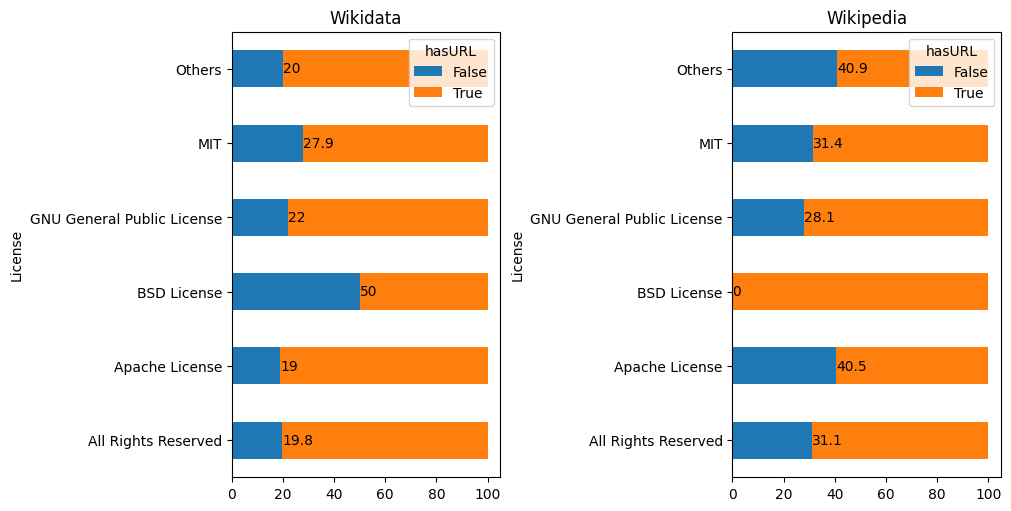

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"].groupby(['License'])['hasURL'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[0])
axs[0].set_title("Wikidata")
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal');
df[df["Category"] == "Wikipedia"].groupby(['License'])['hasURL'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[1])
axs[1].set_title("Wikipedia")
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal');



<ipython-input-50-efa83b51c20e>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df[df["Category"] == "Wikipedia"].groupby(["License"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))


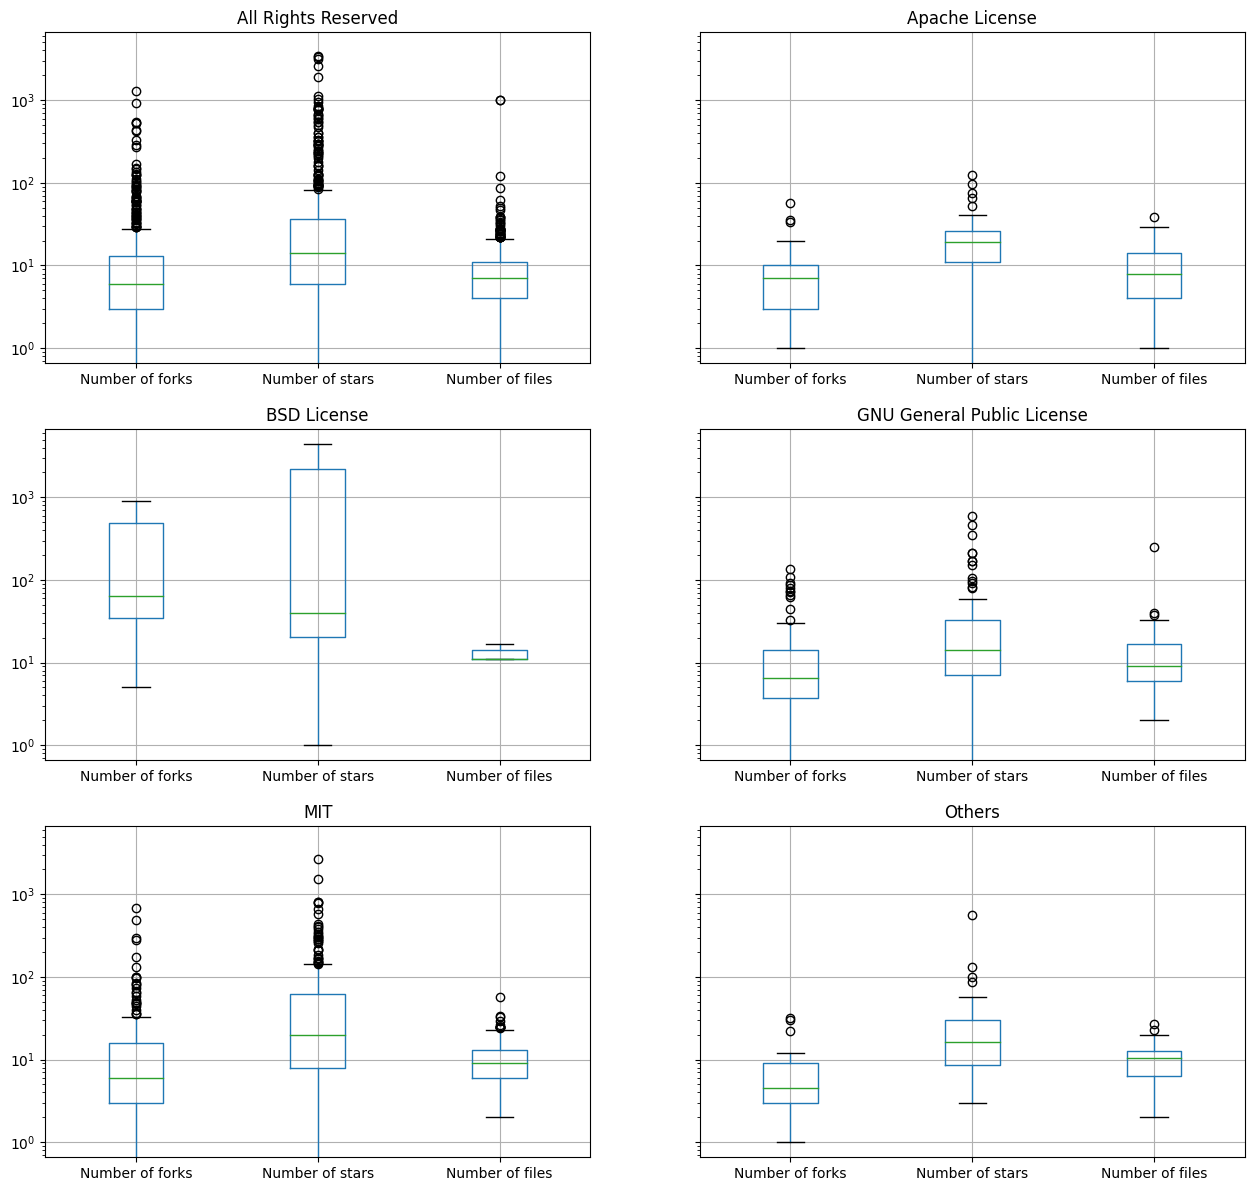

In [50]:
df[df["Category"] == "Wikipedia"].groupby(["License"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))
plt.yscale('log')

<ipython-input-51-40339ec49037>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df[df["Category"] != "Wikipedia"].groupby(["License"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))


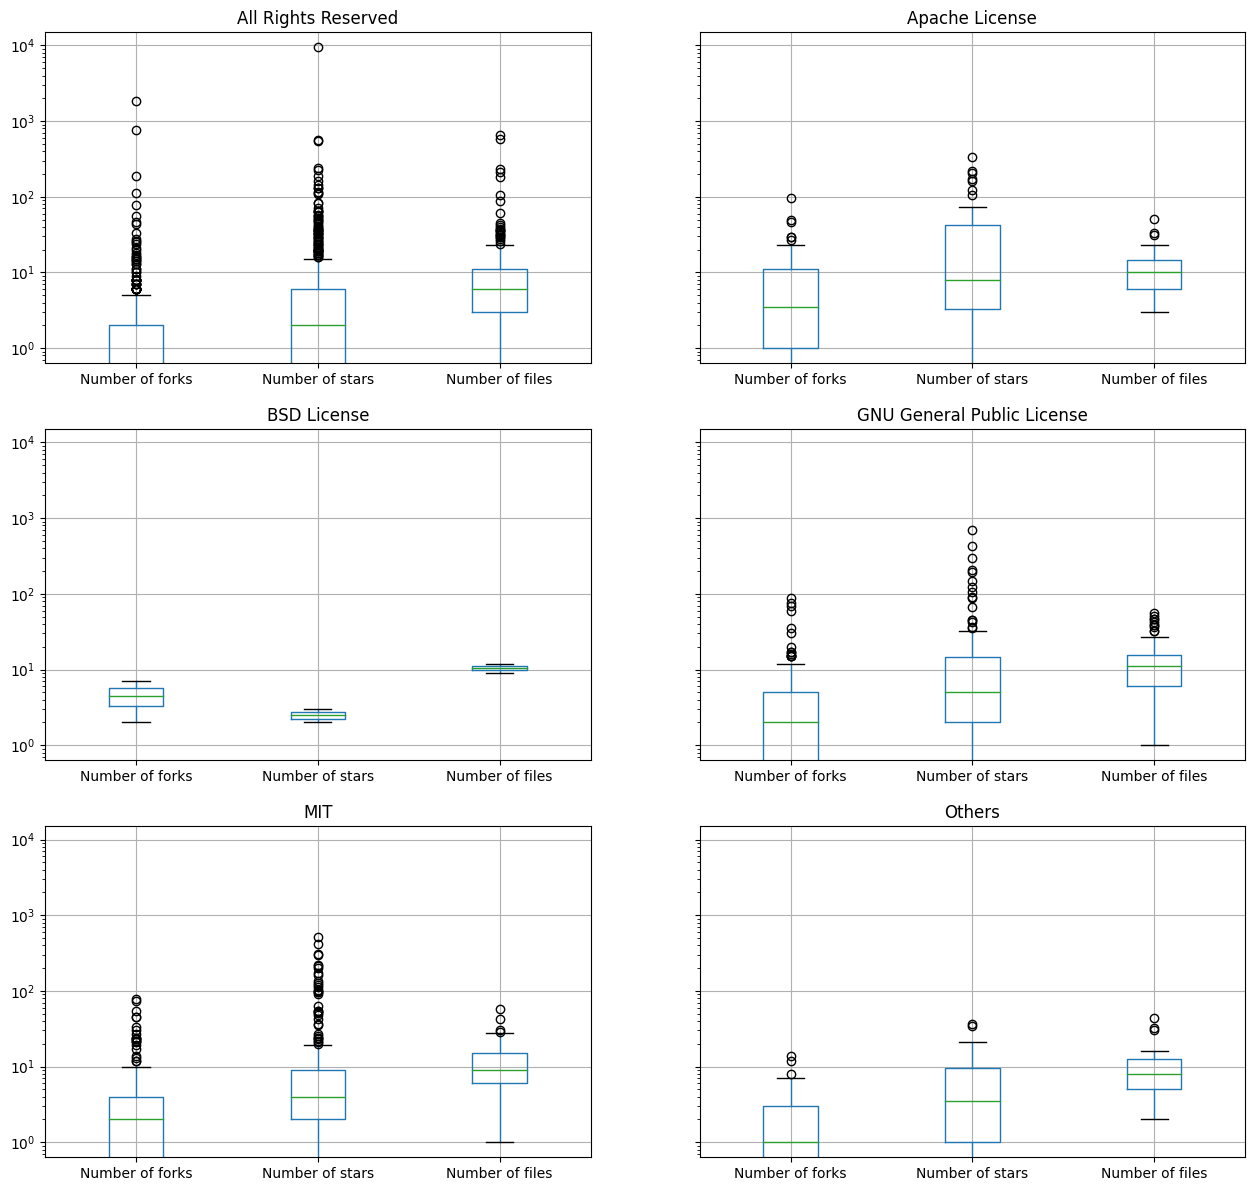

In [51]:
df[df["Category"] != "Wikipedia"].groupby(["License"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))
plt.yscale('log')

In [52]:
lang = list(df["Language"].value_counts()[0:5].index)
def func(x):
  if x in lang:
    return x
  else:
    return "Others"
df["LanguageSimplified"] = df["Language"].apply(func)

In [53]:
df["LanguageSimplified"].value_counts()

Others              606
Python              586
JavaScript          344
None                184
Java                145
Jupyter Notebook    111
Name: LanguageSimplified, dtype: int64

Text(0.5, 1.0, 'Wikipedia')

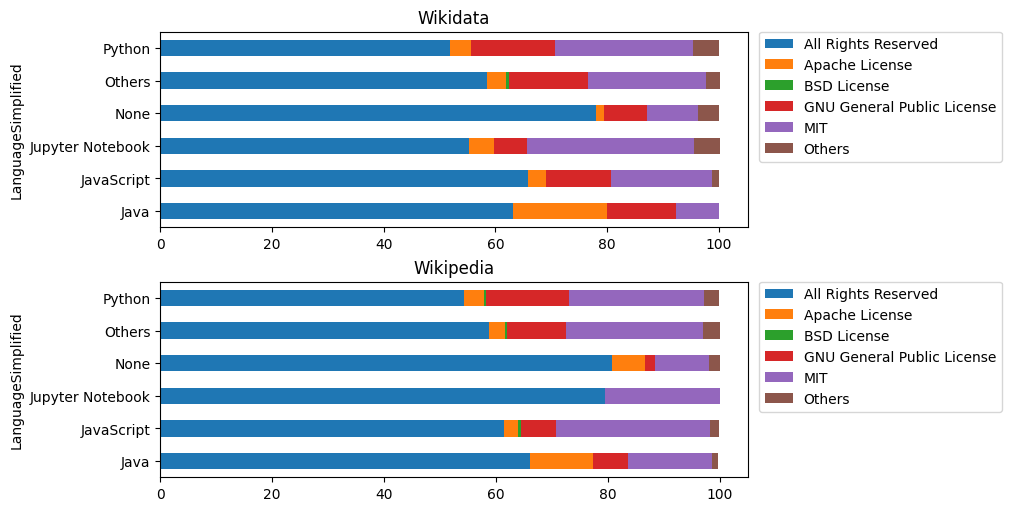

In [54]:
fig, axs = plt.subplots(2, 1, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"].groupby(['LanguageSimplified'])['License'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[0].set_title("Wikidata")
df[df["Category"] == "Wikipedia"].groupby(['LanguageSimplified'])['License'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[1]);
axs[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[1].set_title("Wikipedia")

Text(0.5, 1.0, 'Wikipedia')

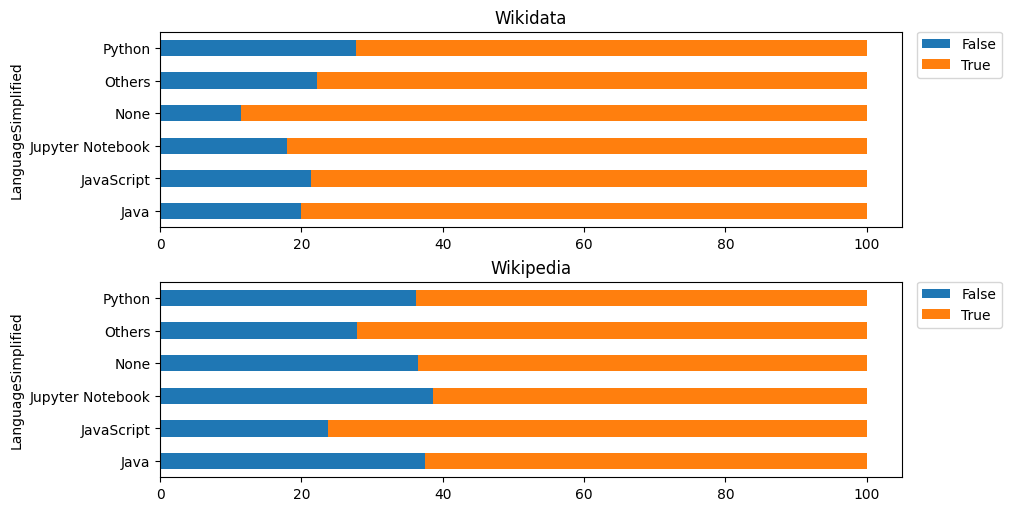

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(10,5), constrained_layout=True)
df[df["Category"] != "Wikipedia"].groupby(['LanguageSimplified'])['hasURL'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[0])
axs[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[0].set_title("Wikidata")
df[df["Category"] == "Wikipedia"].groupby(['LanguageSimplified'])['hasURL'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[1]);
axs[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs[1].set_title("Wikipedia")

<ipython-input-56-51494f80ea2b>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df[df["Category"] == "Wikipedia"].groupby(["LanguageSimplified"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))


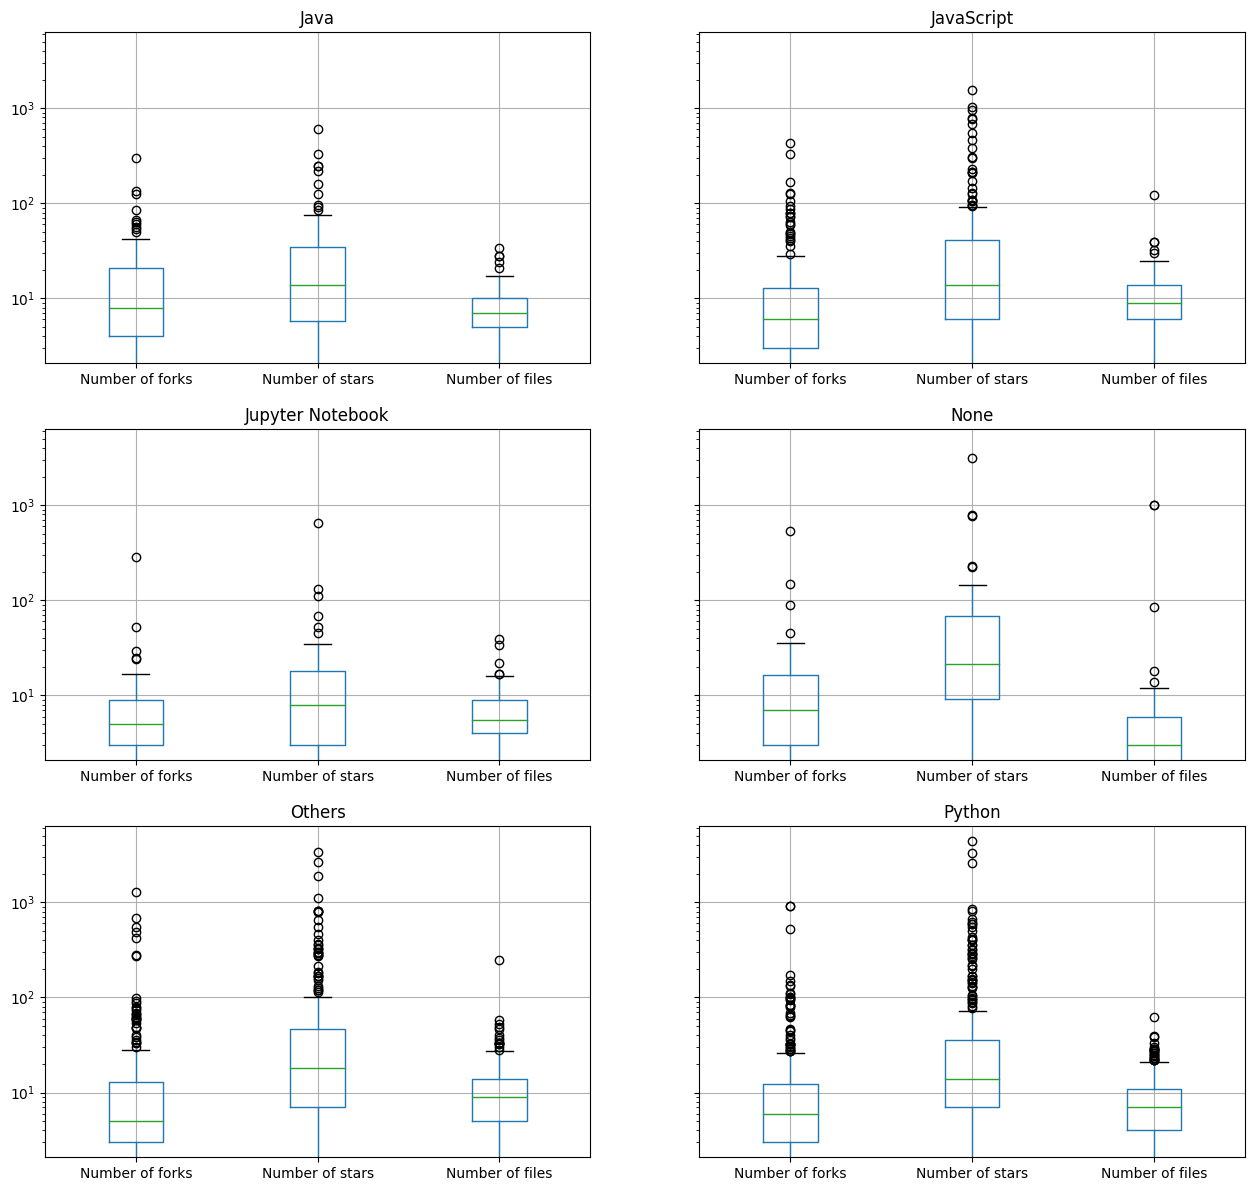

In [56]:
df[df["Category"] == "Wikipedia"].groupby(["LanguageSimplified"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))
plt.yscale('log')
plt.show()

<ipython-input-57-e511f4b12fad>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  df[df["Category"] != "Wikipedia"].groupby(["LanguageSimplified"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))


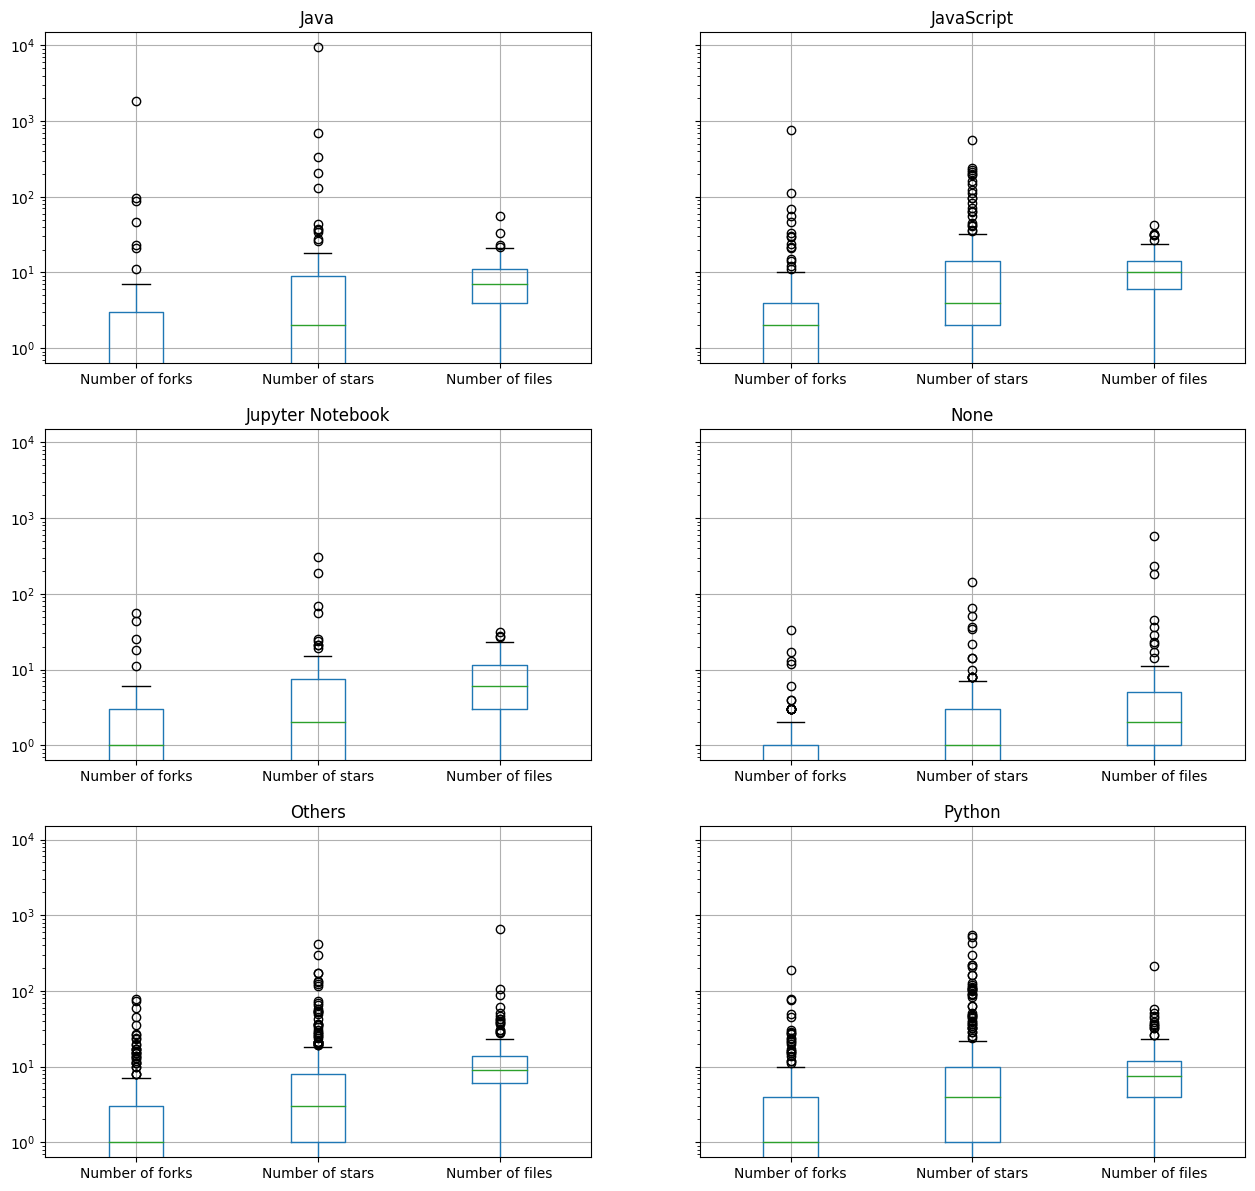

In [57]:
df[df["Category"] != "Wikipedia"].groupby(["LanguageSimplified"]).boxplot(column=['Number of forks', 'Number of stars', 'Number of files'], figsize=(15,15))
plt.yscale('log');

<ipython-input-58-6f141da9051a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for m in df[df["Category"] == "Wikipedia"][df["HighlyStarred"] == True]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):
<ipython-input-58-6f141da9051a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for m in df[df["Category"] != "Wikipedia"][df["HighlyStarred"] == True]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):


[Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

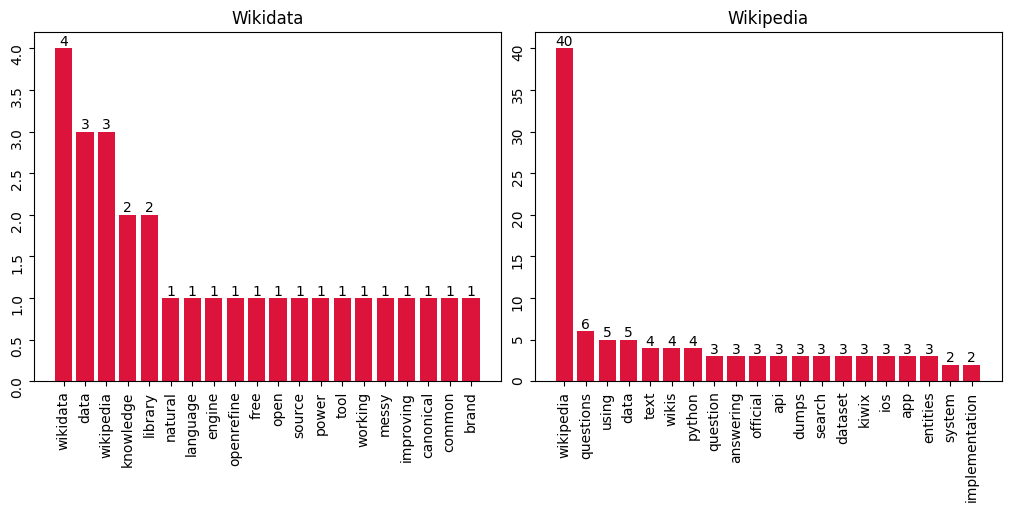

In [58]:
word = []
for m in df[df["Category"] == "Wikipedia"][df["HighlyStarred"] == True]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):
  word += m
from collections import Counter
c = Counter(word)
wordlt = c.most_common(100)
wordlt = [x for x in wordlt if (not(x[0] in stop_words) and (len(x[0])>1))]
x_data = [x[0] for x in wordlt][0:20]
y_data = [x[1] for x in wordlt][0:20]
fig, axs = plt.subplots(1, 2, figsize=(10,5), constrained_layout=True)
axs[1].bar(x_data, y_data, color='crimson')
axs[1].set_title("Wikipedia")
axs[1].tick_params(rotation=90)
axs[1].bar_label(axs[1].containers[0], label_type='edge', rotation='horizontal')
word = []
for m in df[df["Category"] != "Wikipedia"][df["HighlyStarred"] == True]["Description"].str.lower().str.translate(str.maketrans('', '', string.punctuation)).str.split(" "):
  word += m
from collections import Counter
c = Counter(word)
wordlt = c.most_common(100)
wordlt = [x for x in wordlt if (not(x[0] in stop_words) and (len(x[0])>1))]
x_data = [x[0] for x in wordlt][0:20]
y_data = [x[1] for x in wordlt][0:20]
axs[0].bar(x_data, y_data, color='crimson')
axs[0].set_title("Wikidata")
axs[0].tick_params(rotation=90)
axs[0].bar_label(axs[0].containers[0], label_type='edge', rotation='horizontal')